# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Võ Nguyễn Hoàng Kim
- MSSV: 21127090
- Lớp: 21CLC07

# Import

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [140]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [141]:
# Cài đặt các hàm cần thiết ở đây
# Cài đặt hồi quy tuyến tính
class OLSLinearRegression:
  # tính toán
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self

  # lấy ra trọng số
    def get_params(self):
        return self.w

  # dự đoán y
    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

# cài đặt hàm MAE
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

# cài đặt tiền xử lý cho dữ liệu: thêm cột 1 vào vị trí đầu tiên cho tập dữ liệu
def preProcess(x):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    return X


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm)

In [142]:
# Phần code cho yêu cầu 1a

# đọc dữ liệu cho yêu cầu 1a
X_train_1a = train.iloc[:, :11]
y_train_1a = y_train.iloc[:]

X_test_1a = test.iloc[:, :11]
y_test_1a = y_test.iloc[:]

X_test_1a =preProcess(X_test_1a)
X_train_1a = preProcess(X_train_1a)

model = OLSLinearRegression().fit(X_train_1a, y_train_1a)
model.get_params()

array([ 49248.089735  , -23183.32950756,    702.76679172,   1259.0187879 ,
       -99570.60814077,  18369.96244951,   1297.53200035,  -8836.72712299,
          141.75993906,    145.74234652,    114.64331342,  34955.75040521])

In [143]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(X_test_1a)
print('MAE:', mae(y_test_1a, y_hat))

MAE: 105052.5297882305


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 49248.089 - 23183.329\times \text{Gender} + 702.766\times \text{10percentage } + 1259.019\times \text{12percentage} \\ - 99570.608\times \text{CollegeTier} + 18369.962\times \text{Degree} + 1297.532\times \text{collegeGPA} \\ - 8836.727\times \text{CollegeCityTier} + 141.759\times \text{English} + 145.742\times \text{Logical} + 114.643\times \text{Quant} + 34955.750\times \text{Domain}$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [144]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# get name of each columns
listFeature = ["conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]
listMae = []

numFold = 5
kF = KFold(n_splits = numFold, shuffle = True, random_state = 42)

for feature in listFeature:
  sum = 0
  # lấy dữ liệu cho đặc trưng tính cách "feature"
  X_train_feature = X_train[[feature]]
  # thực hiện tiền xử lý cho dữ liệu vừa lấy
  X_train_feature_pre = preProcess(X_train_feature)

  for train_index, test_index in kF.split(X_train_feature_pre):

      train_X, test_X = X_train_feature_pre[train_index], X_train_feature_pre[test_index]
      train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

      model.fit(train_X, train_y)
      y_pred = model.predict(test_X)
      sum += mae(test_y, y_pred)

  avgMae = sum / numFold
  listMae.append([feature, avgMae])

sortedMae = sorted(listMae, key=lambda x: x[1])
minMae = sortedMae[0]
print('The best feature is:', minMae[0])
prediction = pd.DataFrame(sortedMae, columns=['Feature', 'MAE'])
print(prediction)


The best feature is: nueroticism
                 Feature            MAE
0            nueroticism  123473.399787
1          agreeableness  123706.054730
2           extraversion  123809.926200
3  openess_to_experience  123818.333575
4      conscientiousness  124182.563823


In [145]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[minMae[0]].values.reshape(-1, 1)
X_train_best_pre = preProcess(X_train_best)

best_personality_feature_model = OLSLinearRegression().fit(X_train_best_pre, y_train)
best_personality_feature_model.get_params()

array([304647.55255226, -16021.49366179])

In [146]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test_best = X_test[minMae[0]].values.reshape(-1, 1)
X_test_best_pre = preProcess(X_test_best)

y_hat_best = best_personality_feature_model.predict(X_test_best_pre)
print('MAE:', mae(y_test, y_hat_best))

MAE: 119361.91739987818


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 304647.552 - 16021.494\times \text{nueroticism}$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [147]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

listFeature = ["English", "Logical", "Quant"]
listMae = []

numFold = 5
kF = KFold(n_splits = numFold, shuffle = True, random_state = 42)

for feature in listFeature:
  sum = 0

  # lấy dữ liệu cho đặc trưng tính cách "feature"
  X_train_feature = X_train[[feature]]
  # thực hiện tiền xử lý cho dữ liệu vừa lấy
  X_train_feature_pre = preProcess(X_train_feature)

  for train_index, test_index in kF.split(X_train_feature_pre):

      train_X, test_X = X_train_feature_pre[train_index], X_train_feature_pre[test_index]
      train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

      model.fit(train_X, train_y)
      y_pred = model.predict(test_X)
      sum += mae(test_y, y_pred)

  avgMae = sum / numFold
  listMae.append([feature, avgMae])

sortedMae = sorted(listMae, key=lambda x: x[1])
minMae = sortedMae[0]
print('The best feature is:', minMae[0])
prediction = pd.DataFrame(sortedMae, columns=['Feature', 'MAE'])
print(prediction)





The best feature is: Quant
   Feature            MAE
0    Quant  117353.838031
1  Logical  119932.503599
2  English  120728.603666


In [148]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[minMae[0]].values.reshape(-1, 1)
X_train_best_pre = preProcess(X_train_best)

best_skill_feature_model = OLSLinearRegression().fit(X_train_best_pre, y_train)
best_skill_feature_model.get_params()

array([117759.72931231,    368.85246384])

In [149]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_test_best = X_test[minMae[0]].values.reshape(-1, 1)
X_test_best_pre = preProcess(X_test_best)

y_hat_best = best_skill_feature_model.predict(X_test_best_pre)
print('MAE:', mae(y_test, y_hat_best))

MAE: 108814.0596883719


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 117759.729 + 368.852\times \text{Quant}$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

MAE nhỏ nhất

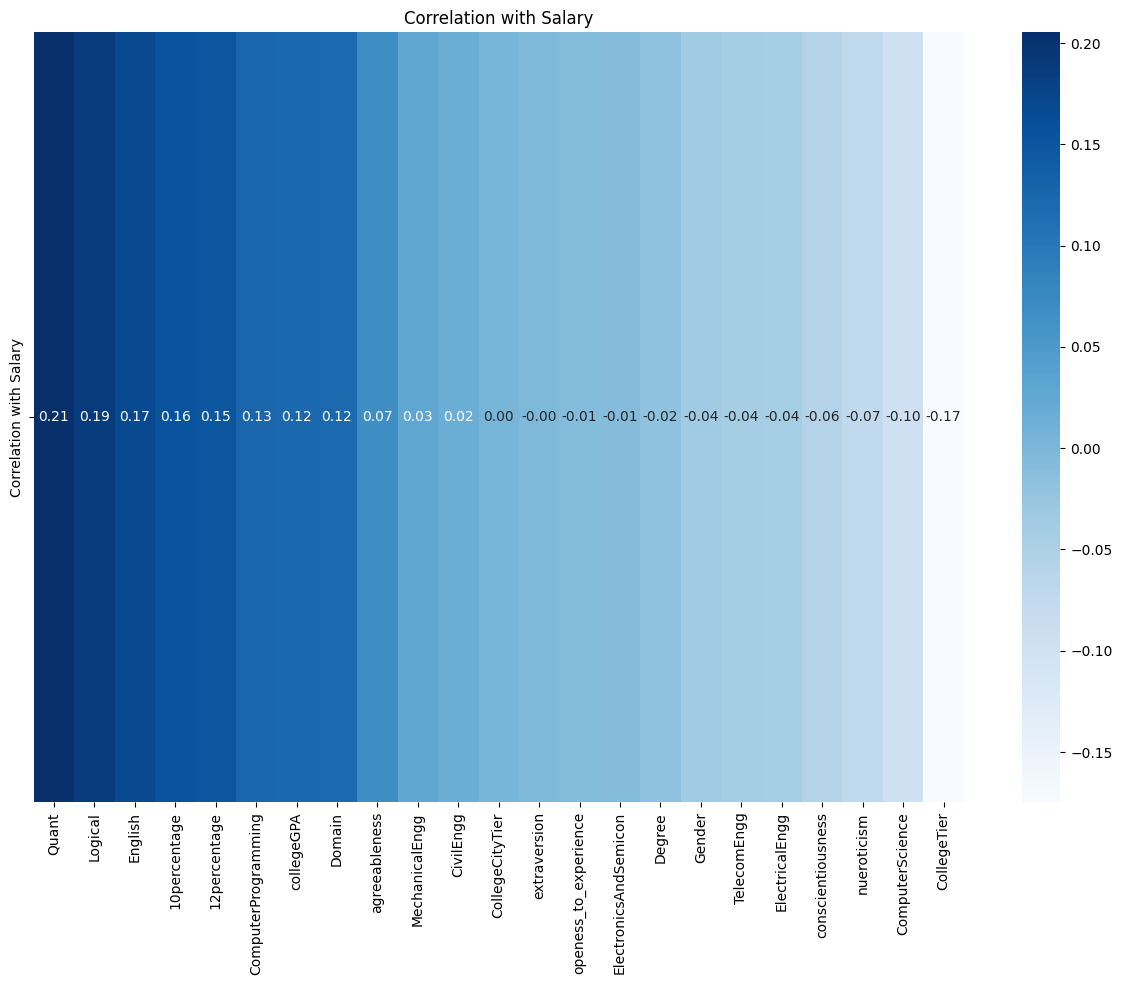

In [150]:
# Tạo ma trận tương quan giữa các đặc trưng với biến mục tiêu trong tập train
correlations_with_salary = X_train.corrwith(y_train)

# Tạo DataFrame từ Series
correlations_DF = pd.DataFrame(correlations_with_salary, columns=['Correlation with Salary'])

# Sắp xếp theo mức độ tương quan giảm dần
correlations_DF = correlations_DF.sort_values(by='Correlation with Salary', ascending=False)

# Vẽ biểu đồ thể hiện sự tương quan giữa các đặc trưng với biến mục tiêu Salary
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlations_DF.transpose(), cmap="Blues", annot=True, fmt=".2f", ax=ax)

plt.title("Correlation with Salary")
plt.show()

In [151]:
# Trình bày các phần tìm ra mô hình

# Mô hình 1 :
def createModel1():
        # Lấy 11 đặc trưng đầu tiên
        X_train_new = X_train.iloc[:, 1:12].copy()

        # Nhân 2 đặc trưng Quant và Logical để tạo đặc trưng mới Quant_Logical
        X_train_new['Quant_Logical'] = X_train['Quant'] * X_train['Logical']

        # Xử lý tập X_train_new bằng hàm preprocess
        X_train_new = preProcess(X_train_new)

        # Thực hiện tương tự trên tập test
        X_test_new = X_test.iloc[:, 1:12].copy()
        X_test_new['Quant_Logical'] = X_test['Quant'] * X_test['Logical']
        X_test_new = preProcess(X_test_new)

        return X_train_new, X_test_new

# Mô hình 2:
def createModel2():
        # 8 đặc trưng có mối tương quan nhiều nhất với biến mục tiêu
        features_2 = [
          "10percentage",
          "12percentage",
          "collegeGPA",
          "English",
          "Logical",
          "Quant",
          "Domain",
          "ComputerProgramming",
          ]

        X_train_new = X_train[features_2].copy()
        
        # tạo đặc trưng Logical_square
        X_train_new['Logical_square'] = X_train['Logical'] ** 2
        
        # tạo đặc trưng Quant_square
        X_train_new['Quant_square'] = X_train['Quant'] ** 2
        
        # tạo đặc trưng Quant_Logical
        X_train_new['Quant_Logical'] = X_train['Quant'] * X_train['Logical']
        X_train_new = preProcess(X_train_new)

        X_test_new = X_test[features_2].copy()
        X_test_new['Logical_square'] = X_test['Logical'] ** 2
        X_test_new['Quant_square'] = X_test['Quant'] ** 2
        X_test_new['Quant_Logical'] = X_test['Quant'] * X_test['Logical']
        X_test_new = preProcess(X_test_new)

        return X_train_new, X_test_new
# ---------------------------------------------

# MÔ HÌNH 3:
def createModel3():
        # 5 đặc trưng có mối tương quan nhiều nhất với biến mục tiêu
        features_2 = [
            "Quant",
            "Logical",
            "English",
            "10percentage",
            "12percentage",
        ]
        X_train_new = X_train[features_2].copy()

        X_train_new['Logical_cubed'] = X_train['Logical'] ** 3

        X_train_new['Quant_cubed'] = X_train['Quant'] ** 3

        X_train_new['Quant_square'] = X_train['Quant']**2

        X_train_new['Logical_square'] = X_train['Logical']**2
        X_train_new = preProcess(X_train_new)

        X_test_new = X_test[features_2].copy()
        X_test_new['Logical_cubed'] = X_test['Logical'] ** 3
        X_test_new['Quant_cubed'] = X_test['Quant'] ** 3
        X_test_new['Quant_square'] = X_test['Quant']**2
        X_test_new['Logical_square'] = X_test['Logical']**2
        X_test_new = preProcess(X_test_new)
        return X_train_new, X_test_new
# ---------------------------------------------

## Thử nghiệm, so sánh các mô hình

In [152]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu
X_train_all_model, X_test_all_model = [], []

# Mô hình 1
X_train_new, X_test_new = createModel1()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Mô hình 2
X_train_new, X_test_new = createModel2()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Mô hình 3
X_train_new, X_test_new = createModel3()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Khởi tạo mô hình
model = OLSLinearRegression()

# Số lượng fold
numFold = 5

# Cross-validation
kf = KFold(n_splits=numFold, shuffle=True, random_state=42)

listMae = []
index = 0
for X_train_model in X_train_all_model:
    index +=1
    sum = 0
    for train_index, test_index in kf.split(X_train_model):
        train_X, test_X = X_train_model[train_index], X_train_model[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)

        sum += mae(test_y, y_pred)

    avgMae = sum / numFold
    listMae.append([f"model_{index}",avgMae])

sorted_mae = sorted(listMae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('The best model is :', min_mae[0])

prediction = pd.DataFrame(sorted_mae, columns=['Model', 'MAE'])
print(prediction)

The best model is : model_1
     Model            MAE
0  model_1  113274.019627
1  model_2  113301.802929
2  model_3  114880.105333


In [153]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
best_model_train, best_model_test = createModel1()
if min_mae[0] == 'model_2':
  best_model_train, best_model_test = createModel2()
elif min_mae[0] == 'model_3':
  best_model_train, best_model_test = createModel3()

my_best_model = OLSLinearRegression().fit(best_model_train, y_train)
for i in my_best_model.get_params():
  i = "{:.3f}".format(i)
  print(i)

18592.171
638.262
1154.728
-101383.425
12306.596
993.431
-10172.735
136.332
191.579
193.767
26015.100
68.754
-0.130


In [154]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_hat_best = my_best_model.predict(best_model_test)
print('MAE:', mae(y_test, y_hat_best))

MAE: 104321.78408038824


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 18592.171 + 638.262\times \text{10percentage} + 1017.654\times \text{12percentage} \\ + 1275.906\times \text{collegeGPA} + 155.410\times \text{English} - 1402.431\times \text{Logical} + 494.695\times \text{Quant} \\ + 24961.646\times \text{Domain} + 68.846\times \text{ComputerProgramming} + $$
          
